In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyparallel as ipp
%matplotlib inline


In [31]:
client = ipp.Client()
view=client[:]
view

<DirectView [0, 1, 2, 3]>

In [39]:
EsPrimo=lambda x: all(x % i != 0 for i in range(int(x**0.5)+1)[2:]) and x>1
def Prime_Numpy(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(int(x**0.5)+1)[2:]]))
def Prime_Numpy_mod(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    r = np.mod(x, lista)
    return np.all(r)

In [12]:
Lambda_times = []
for n in range(0, 20):
    timeit = %timeit -o view.map_sync(EsPrimo, 2**np.arange(n))
    Lambda_times.append(timeit.best)

1000 loops, best of 3: 658 µs per loop
10 loops, best of 3: 53.2 ms per loop
10 loops, best of 3: 91.4 ms per loop
10 loops, best of 3: 142 ms per loop
1 loop, best of 3: 185 ms per loop
10 loops, best of 3: 193 ms per loop
1 loop, best of 3: 153 ms per loop
1 loop, best of 3: 151 ms per loop
10 loops, best of 3: 165 ms per loop
10 loops, best of 3: 171 ms per loop
10 loops, best of 3: 195 ms per loop
10 loops, best of 3: 165 ms per loop
10 loops, best of 3: 178 ms per loop
10 loops, best of 3: 187 ms per loop
10 loops, best of 3: 187 ms per loop
1 loop, best of 3: 134 ms per loop
10 loops, best of 3: 181 ms per loop
1 loop, best of 3: 148 ms per loop
10 loops, best of 3: 186 ms per loop
1 loop, best of 3: 163 ms per loop


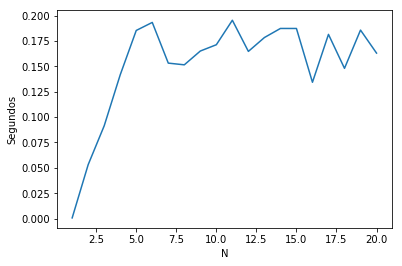

In [41]:
Range=  range(21)[1:]
plt.xlabel('N')
plt.ylabel('Segundos')
plt.plot(Range, Lambda_times, label='Función Lambda ')

In [40]:
Numpy_times = []
for n in range(0, 20):
    timeit = %timeit -o view.map_sync(Prime_Numpy, 2**np.arange(n))
    Numpy_times.append(timeit.best)


1000 loops, best of 3: 503 µs per loop
10 loops, best of 3: 48.6 ms per loop
1 loop, best of 3: 78.1 ms per loop
The slowest run took 5.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 120 ms per loop
1 loop, best of 3: 163 ms per loop
10 loops, best of 3: 212 ms per loop
1 loop, best of 3: 187 ms per loop
10 loops, best of 3: 191 ms per loop
10 loops, best of 3: 209 ms per loop
10 loops, best of 3: 220 ms per loop
1 loop, best of 3: 165 ms per loop
10 loops, best of 3: 203 ms per loop
1 loop, best of 3: 159 ms per loop
10 loops, best of 3: 201 ms per loop
1 loop, best of 3: 164 ms per loop
10 loops, best of 3: 164 ms per loop
1 loop, best of 3: 150 ms per loop
1 loop, best of 3: 163 ms per loop
1 loop, best of 3: 160 ms per loop
10 loops, best of 3: 207 ms per loop


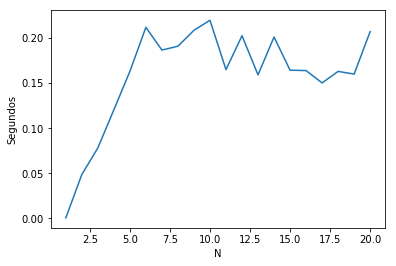

In [42]:
Range=  range(21)[1:]
plt.xlabel('N')
plt.ylabel('Segundos')
plt.plot(Range, Numpy_times, label='Numpy ')


In [43]:
Numpy_Mod_times = []
for n in range(0, 20):
    timeit = %timeit -o view.map_sync(Prime_Numpy_mod, 2**np.arange(n))
    Numpy_Mod_times.append(timeit.best)

1000 loops, best of 3: 543 µs per loop
10 loops, best of 3: 54.1 ms per loop
10 loops, best of 3: 115 ms per loop
10 loops, best of 3: 116 ms per loop
1 loop, best of 3: 182 ms per loop
1 loop, best of 3: 220 ms per loop
The slowest run took 6.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 199 ms per loop
1 loop, best of 3: 279 ms per loop
1 loop, best of 3: 192 ms per loop
The slowest run took 7.42 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 163 ms per loop
10 loops, best of 3: 282 ms per loop
The slowest run took 6.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 164 ms per loop
1 loop, best of 3: 160 ms per loop
1 loop, best of 3: 233 ms per loop
10 loops, best of 3: 250 ms per loop
10 loops, best of 3: 204 ms per loop
1 loop, best of 3: 154 ms per loop
10 loops, best of 3: 224 ms per lo

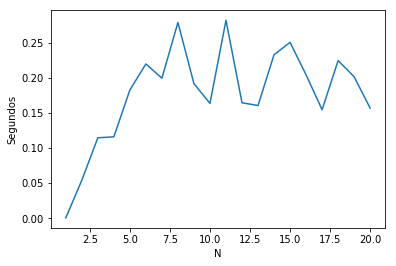

In [46]:
Range=  range(21)[1:]
plt.xlabel('N')
plt.ylabel('Segundos')
plt.plot(Range, Numpy_Mod_times, label='Numpy Modulo')

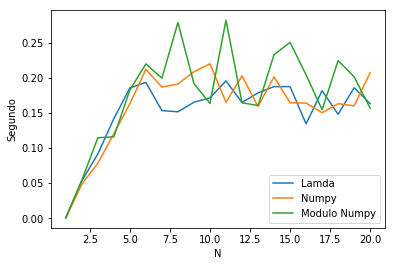

In [47]:
plt.plot(Range, Lambda_times, label='Lamda')
plt.plot(Range, Numpy_times, label='Numpy')
plt.plot(Range, Numpy_Mod_times, label='Modulo Numpy')
plt.xlabel('N')
plt.ylabel('Segundo')
plt.legend()